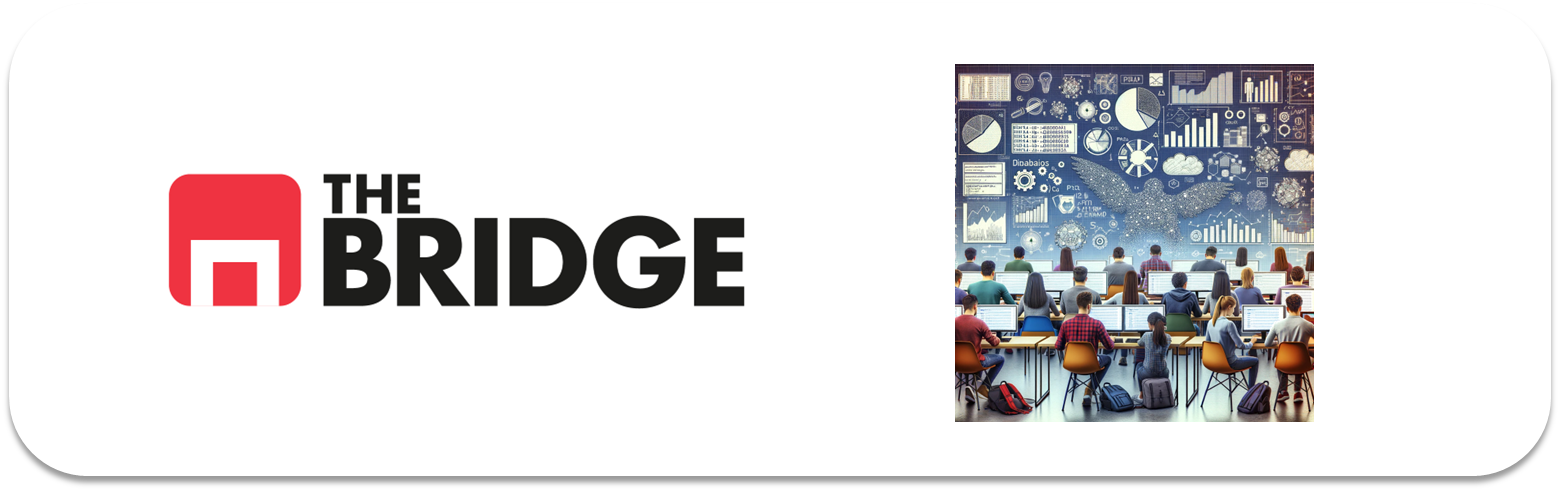

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descargar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [375]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



In [376]:
# 1. Carga el dataset del Titanic.

df = pd.read_csv("./data/titanic.csv")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [377]:
# 2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.

df = df.drop(columns=["embarked", "deck", "alive", "sibsp"])
df

,survived,pclass,sex,age,parch,fare,class,who,adult_male,embark_town,alone
0,0,3,male,22.0,0,7.2500,Third,man,True,Southampton,False
1,1,1,female,38.0,0,71.2833,First,woman,False,Cherbourg,False
2,1,3,female,26.0,0,7.9250,Third,woman,False,Southampton,True
3,1,1,female,35.0,0,53.1000,First,woman,False,Southampton,False
4,0,3,male,35.0,0,8.0500,Third,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,Second,man,True,Southampton,True
887,1,1,female,19.0,0,30.0000,First,woman,False,Southampton,True
888,0,3,female,NaN,2,23.4500,Third,woman,False,Southampton,False
889,1,1,male,26.0,0,30.0000,First,man,True,Cherbourg,True


In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   parch        891 non-null    int64  
 5   fare         891 non-null    float64
 6   class        891 non-null    object 
 7   who          891 non-null    object 
 8   adult_male   891 non-null    bool   
 9   embark_town  889 non-null    object 
 10  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(3), object(4)
memory usage: 64.5+ KB


In [379]:
df.embark_town.value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [380]:
df.age.sort_values()

803    0.42
755    0.67
644    0.75
469    0.75
78     0.83
       ... 
859     NaN
863     NaN
868     NaN
878     NaN
888     NaN
Name: age, Length: 891, dtype: float64

In [381]:
filas_nulas = df[df['age'].isnull()]
print(filas_nulas)

     survived  pclass     sex  age  parch     fare   class    who  adult_male  \
5           0       3    male  NaN      0   8.4583   Third    man        True   
17          1       2    male  NaN      0  13.0000  Second    man        True   
19          1       3  female  NaN      0   7.2250   Third  woman       False   
26          0       3    male  NaN      0   7.2250   Third    man        True   
28          1       3  female  NaN      0   7.8792   Third  woman       False   
..        ...     ...     ...  ...    ...      ...     ...    ...         ...   
859         0       3    male  NaN      0   7.2292   Third    man        True   
863         0       3  female  NaN      2  69.5500   Third  woman       False   
868         0       3    male  NaN      0   9.5000   Third    man        True   
878         0       3    male  NaN      0   7.8958   Third    man        True   
888         0       3  female  NaN      2  23.4500   Third  woman       False   

     embark_town  alone  
5

In [382]:

# Eliminar filas con valores NaN
df = df.dropna()

In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     712 non-null    int64  
 1   pclass       712 non-null    int64  
 2   sex          712 non-null    object 
 3   age          712 non-null    float64
 4   parch        712 non-null    int64  
 5   fare         712 non-null    float64
 6   class        712 non-null    object 
 7   who          712 non-null    object 
 8   adult_male   712 non-null    bool   
 9   embark_town  712 non-null    object 
 10  alone        712 non-null    bool   
dtypes: bool(2), float64(2), int64(3), object(4)
memory usage: 57.0+ KB


<Axes: xlabel='survived', ylabel='count'>

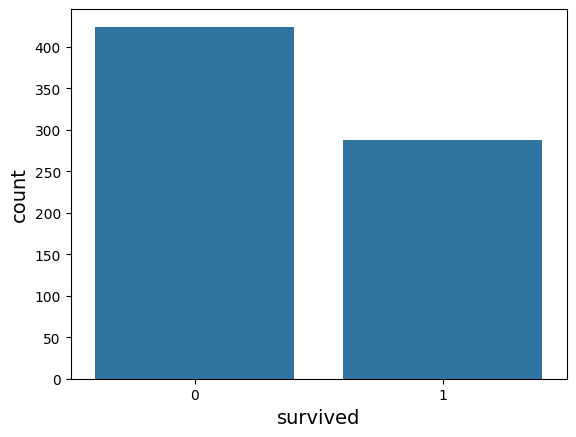

In [384]:
# 3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.

target = "survived"

sns.countplot(data=df, x=target)



In [385]:
# 4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.

train_set, test_set = train_test_split(df, test_size=0.2, stratify=df["embark_town"], random_state=42)




In [386]:
train_set["embark_town"].value_counts(normalize=True)

embark_town
Southampton    0.778559
Cherbourg      0.182777
Queenstown     0.038664
Name: proportion, dtype: float64

In [387]:
train_set

,survived,pclass,sex,age,parch,fare,class,who,adult_male,embark_town,alone
391,1,3,male,21.0,0,7.7958,Third,man,True,Southampton,True
519,0,3,male,32.0,0,7.8958,Third,man,True,Southampton,True
211,1,2,female,35.0,0,21.0000,Second,woman,False,Southampton,True
208,1,3,female,16.0,0,7.7500,Third,woman,False,Queenstown,True
794,0,3,male,25.0,0,7.8958,Third,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...
392,0,3,male,28.0,0,7.9250,Third,man,True,Southampton,False
753,0,3,male,23.0,0,7.8958,Third,man,True,Southampton,True
238,0,2,male,19.0,0,10.5000,Second,man,True,Southampton,True
224,1,1,male,38.0,0,90.0000,First,man,True,Southampton,False


In [388]:
test_set["embark_town"].value_counts(normalize=True)

embark_town
Southampton    0.776224
Cherbourg      0.181818
Queenstown     0.041958
Name: proportion, dtype: float64

In [389]:
# 5. Construye las parejas X,y de train y test.

X_train = train_set.drop(["survived"], axis=1)
y_train = train_set["survived"]
X_test = test_set.drop(["survived"], axis=1)
y_test = test_set["survived"]

features_num = ["age", "fare"]
features_cat = ["pclass", "sex", "parch", "class", "who", "adult_male", "embark_town", "alone" ]



In [390]:
X_train

,pclass,sex,age,parch,fare,class,who,adult_male,embark_town,alone
391,3,male,21.0,0,7.7958,Third,man,True,Southampton,True
519,3,male,32.0,0,7.8958,Third,man,True,Southampton,True
211,2,female,35.0,0,21.0000,Second,woman,False,Southampton,True
208,3,female,16.0,0,7.7500,Third,woman,False,Queenstown,True
794,3,male,25.0,0,7.8958,Third,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...
392,3,male,28.0,0,7.9250,Third,man,True,Southampton,False
753,3,male,23.0,0,7.8958,Third,man,True,Southampton,True
238,2,male,19.0,0,10.5000,Second,man,True,Southampton,True
224,1,male,38.0,0,90.0000,First,man,True,Southampton,False


In [391]:
y_train

391    1
519    0
211    1
208    1
794    0
      ..
392    0
753    0
238    0
224    1
357    0
Name: survived, Length: 569, dtype: int64

In [392]:
X_test

,pclass,sex,age,parch,fare,class,who,adult_male,embark_town,alone
288,2,male,42.0,0,13.0000,Second,man,True,Southampton,True
604,1,male,35.0,0,26.5500,First,man,True,Cherbourg,True
540,1,female,36.0,2,71.0000,First,woman,False,Southampton,False
844,3,male,17.0,0,8.6625,Third,man,True,Southampton,True
353,3,male,25.0,0,17.8000,Third,man,True,Southampton,False
...,...,...,...,...,...,...,...,...,...,...
280,3,male,65.0,0,7.7500,Third,man,True,Queenstown,True
237,2,female,8.0,2,26.2500,Second,child,False,Southampton,False
627,1,female,21.0,0,77.9583,First,woman,False,Southampton,True
179,3,male,36.0,0,0.0000,Third,man,True,Southampton,True


In [393]:
y_test

288    1
604    1
540    1
844    0
353    0
      ..
280    0
237    1
627    1
179    0
678    0
Name: survived, Length: 143, dtype: int64

In [394]:
# 6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.



# Separar columnas numéricas y categóricas
num_cols = X_train.select_dtypes(include=['number']).columns
cat_cols = X_train.select_dtypes(exclude=['number']).columns

# Imputar valores faltantes en columnas numéricas
num_imputer = SimpleImputer(strategy='mean')
X_train_num = pd.DataFrame(num_imputer.fit_transform(X_train[num_cols]), columns=num_cols)
X_test_num = pd.DataFrame(num_imputer.transform(X_test[num_cols]), columns=num_cols)

# Imputar valores faltantes en columnas categóricas
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train_cat = pd.DataFrame(cat_imputer.fit_transform(X_train[cat_cols]), columns=cat_cols)
X_test_cat = pd.DataFrame(cat_imputer.transform(X_test[cat_cols]), columns=cat_cols)

# Reunir columnas numéricas y categóricas
X_train_imputed = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_imputed = pd.concat([X_test_num, X_test_cat], axis=1)


In [395]:
# 7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
X_train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       569 non-null    float64
 1   age          569 non-null    float64
 2   parch        569 non-null    float64
 3   fare         569 non-null    float64
 4   sex          569 non-null    object 
 5   class        569 non-null    object 
 6   who          569 non-null    object 
 7   adult_male   569 non-null    object 
 8   embark_town  569 non-null    object 
 9   alone        569 non-null    object 
dtypes: float64(4), object(6)
memory usage: 44.6+ KB


In [396]:
X_train_imputed.head()

,pclass,age,parch,fare,sex,class,who,adult_male,embark_town,alone
0,3.0,21.0,0.0,7.7958,male,Third,man,True,Southampton,True
1,3.0,32.0,0.0,7.8958,male,Third,man,True,Southampton,True
2,2.0,35.0,0.0,21.0000,female,Second,woman,False,Southampton,True
3,3.0,16.0,0.0,7.7500,female,Third,woman,False,Queenstown,True
4,3.0,25.0,0.0,7.8958,male,Third,man,True,Southampton,True


In [397]:
features_num = ["age", "fare"]
features_cat = ["pclass", "sex", "parch", "class", "who", "adult_male", "embark_town", "alone" ]



array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

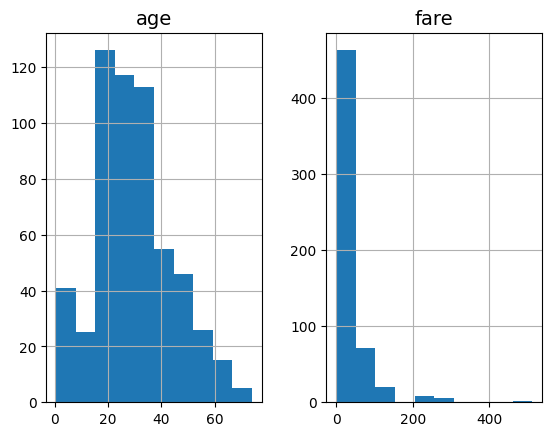

In [398]:
X_train_imputed[features_num].hist()

In [399]:
# Combinar X_train y y_train en un único DataFrame
train_set = pd.concat([X_train_imputed, y_train.reset_index(drop=True)], axis=1)

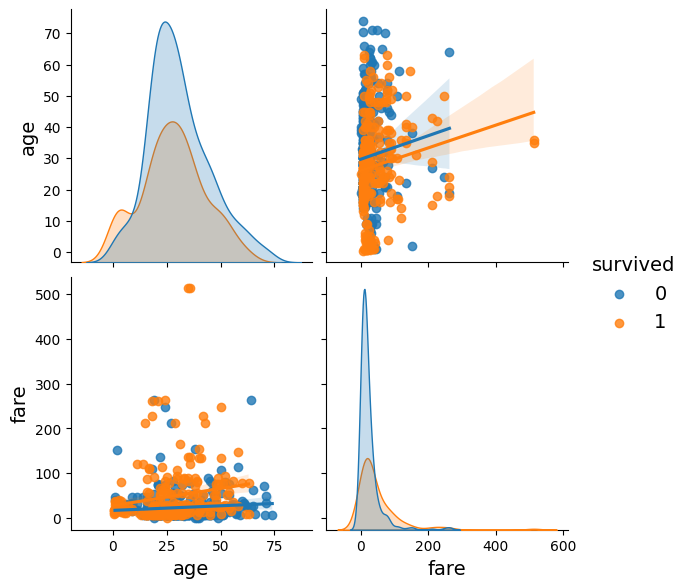

In [400]:



sns.pairplot(train_set, hue=target, height=3, vars=features_num, kind="reg");

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

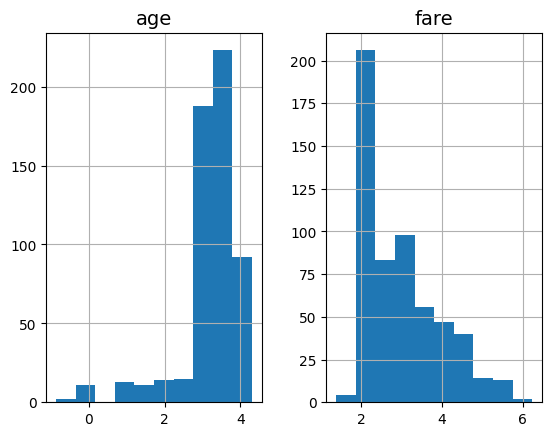

In [401]:
# 8. Trata las variables para que funcionen lo mejor posible en el modelo.

for col in features_num:
    # Aplica la transformación logarítmica solo a valores positivos
    train_set[col] = train_set[col].apply(lambda x: np.log(x) if x > 0 else np.nan)

# Dibuja los histogramas después de la transformación
train_set[features_num].hist()

In [402]:
for col in features_num:
    # Aplica la transformación logarítmica solo a valores positivos
    test_set[col] = test_set[col].apply(lambda x: np.log(x) if x > 0 else np.nan)

In [403]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_set[features_num]) # Adaptamos el StandarScaler al Train,
# pero luego usamos el mismo en el test (porque ya la media y la desviación son las del train)
X_train = pd.DataFrame(scaler.transform(train_set[features_num]), columns = features_num)
X_test = pd.DataFrame(scaler.transform(test_set[features_num]), columns= features_num)
X_train.describe()

,age,fare
count,569.000000,5.630000e+02
mean,0.000000,-9.149973e-17
std,1.000880,1.000889e+00
min,-5.044976,-1.701690e+00
25%,-0.233185,-9.632208e-01
50%,0.185902,-2.446488e-01
75%,0.566266,5.627727e-01
max,1.396388,3.441876e+00


In [404]:
y_train = train_set["survived"]
y_test = test_set["survived"]

In [405]:
# Aplicar One-Hot Encoding
X_train_encoded = pd.get_dummies(X_train_imputed, columns=features_cat, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_imputed, columns=features_cat, drop_first=True)

# Asegurarse de que las columnas de train y test sean consistentes
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [406]:

# 9. Construye un modelo de regresión logística.

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=10000) 

clf.fit(X_train_encoded, y_train) # No hay que decir nada en especial, 
# el detecta el tipo de clasificador multicategórico y aplica el one-vs-rest o one-vs-all


LogisticRegression(max_iter=10000)

In [407]:
# 10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
 



In [408]:
# 11. Procesa el dataset de Test para que puedas usarlo en la evaluación

In [410]:


# 12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.

from sklearn.metrics import precision_score, recall_score, accuracy_score, \
balanced_accuracy_score,roc_auc_score, roc_curve, precision_recall_curve, \
confusion_matrix, ConfusionMatrixDisplay

y_proba = clf.predict_proba(X_test_encoded)
y_pred = clf.predict(X_test_encoded)

In [411]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=[f"Real {i}" for i in clf.classes_], 
                  columns=[f"Predicho {i}" for i in clf.classes_])

cm

,Predicho 0,Predicho 1
Real 0,75,10
Real 1,13,45


In [412]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87        85
           1       0.82      0.78      0.80        58

    accuracy                           0.84       143
   macro avg       0.84      0.83      0.83       143
weighted avg       0.84      0.84      0.84       143



In [ ]:
# 13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
# 14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.